# RAPPEL : Classification plus proche voisin (Nearest Neighbor)

## Classification 

Problème d'apprentissage statistique **supervisé**

Il existe une fonction inconnue $f:A\mapsto B$ qui associe à chaque élément du domaine $A$ un élement de l'ensemble **fini** $B$. On assimile généralement $B$ à $\{1,\dots,|B|\}$.  

Lorsque $|B|=2$, on parle de classification binaire. 

BUT : Trouver une fonction $f^*:A\mapsto B$ qui "s'approche le plus possible" de $f$ dans un ensemble de fonctions $F$ donné. 

ETANT DONNÉ :
* un **ensemble d'apprentissage** de $n$ couples $\{(x_i,f(x_i))\}_i^n$ 
* un **ensemble de test** de $m$ couples $\{(x_j,f(x_j))\}_j^m$ 

* Étape 1 - Apprentissage : Pour chercher $f^*$, on ne peut utiliser que l'ensemble d'apprentissage. $f^*$ ne dépend ainsi que des $x_i$
* Étape 2 - Evaluation : La qualité de la solution $f^*$ trouvée est ensuite mesurée sur l'ensemble de test, par exemple en comptant les "bonnes réponses", *i.e.*,  les $x_j$ pour lesquels $f(x_j)=f^*(x_j)$ 

Exemples :
* SMS $\mapsto \{SPAM,OK\}$
* ImageDeFeuDeSignalisation $\mapsto \{ROUGE, ORANGE, VERT\}$
* PhotoDIdentité $\mapsto$ NomDeLaPersonne




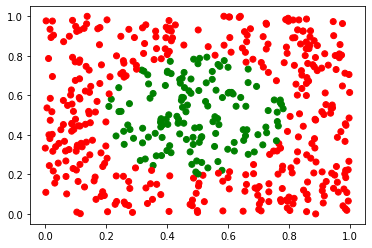

In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt

def verite(x):
    return math.sqrt((x[0]-0.5)**2 + (x[1]-0.5)**2) < 0.3

X = np.random.rand(1000, 2)
Y = [verite(x) for x in X]

X_train = X[:500]
Y_train = Y[:500]
X_test = X[500:]
Y_test = Y[500:]

plt.scatter(*X_train.T,c=['g' if y else 'r' for y in Y_train]);

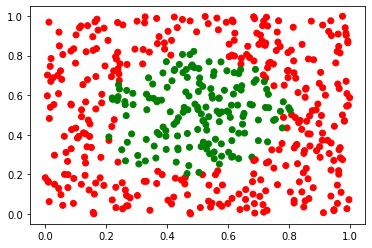

In [41]:
def dist(a,b):
    return (a[0]-b[0])**2 + (a[1]-b[1])**2

def classificateur(x):
    mind = None
    for xi,yi in zip(X_train, Y_train):
        d = dist(x,xi)
        if mind is None or d <= mind:
            prediction = yi 
            mind = d
    return prediction


Y_pred = np.array([classificateur(x) for x in X_test])

plt.scatter(*X_test.T,c=['g' if y else 'r' for y in Y_pred]);


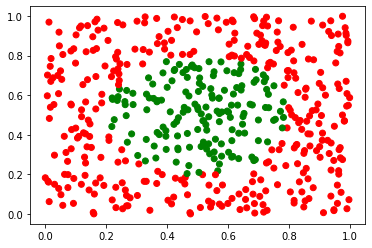

In [42]:
plt.scatter(*X_test.T,c=['g' if y else 'r' for y in Y_test]);

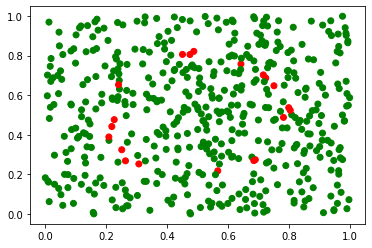

In [44]:
plt.scatter(*X_test.T,c=['g' if y else 'r' for y in Y_pred == Y_test]);

# Défauts de la classification PPV

* Coût calculatoire de la décision
* On parcourt tous les points d'entraînement à chaque décision
* Pas vraiment de séparation entre la partie "prise de décision" et la partie "apprentissage"
* -> peut-on alors vraiment dire que PPV est bien un "algorithme d'apprentissage" ?

